<a href="https://colab.research.google.com/github/hemoabdullah/PCVK_smst5/blob/main/week9_Hammam_Abdullah_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicum Assignment:

### 1.

In [1]:
import google.colab.drive
google.colab.drive.mount('/content/drive')


Mounted at /content/drive


### 2.

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

###3. Create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), with threshold=170, manually according to the description in the chart shown above.

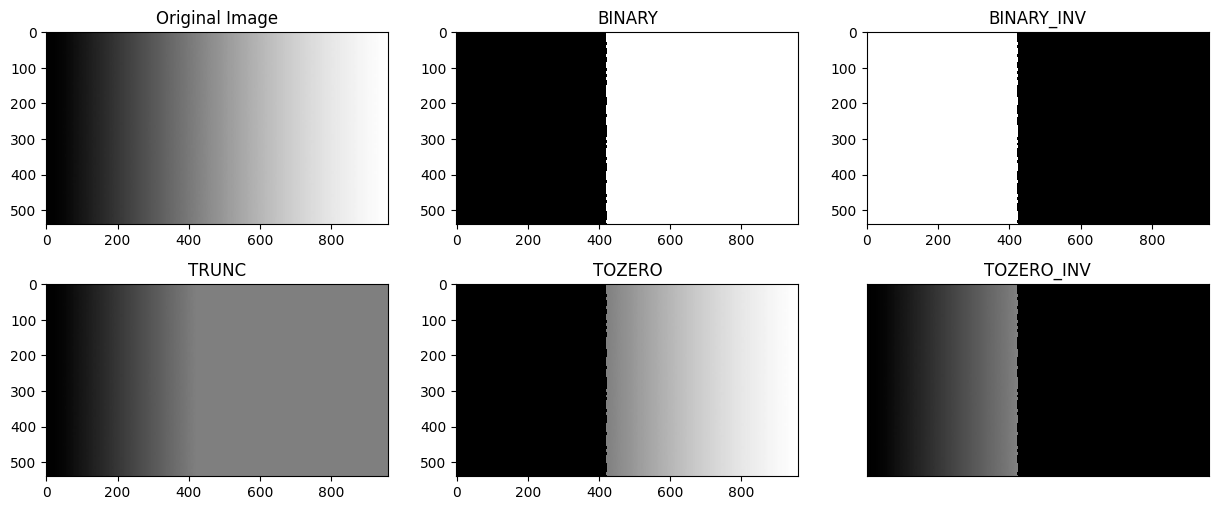

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)


thresh = 127 #nilai Threshold yang ditentukan
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


plt.figure(figsize = (15,6))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
plt.xticks([]),plt.yticks([])
plt.show()

### 4. Create an Otsu thresholding function without using a library. Also display the threshold value when using Otsu's, as shown in the following image. (Use the image balloon.jpg to see the difference between the Otsu's results and the standard global threshold.)

Optimal Otsu's Threshold (manual): 93


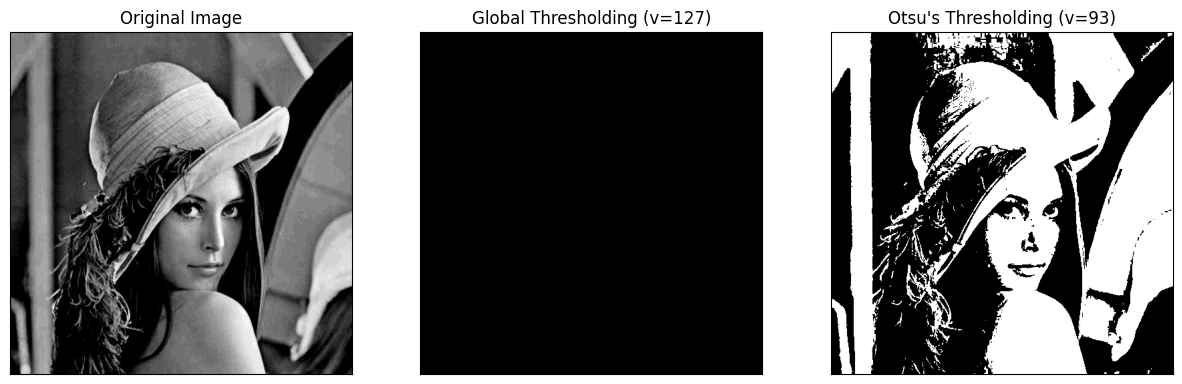

In [7]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_gs_lc2.jpg', 0)
hist = cv.calcHist([img],[0],None,[256],[0,256])
histnorm = hist.ravel()/hist.sum()
totalpix = img.shape[0]*img.shape[1]


best_variance = 0
optimal_threshold = 0
for t in range(256):
    wb = np.sum(histnorm[:t])
    wf = np.sum(histnorm[t:])

    if wb == 0 or wf == 0:
        continue

    mean_b = np.sum(np.arange(t) * histnorm[:t]) / wb
    mean_f = np.sum(np.arange(t, 256) * histnorm[t:]) / wf

    between_class_variance = wb * wf * (mean_b - mean_f) ** 2

    if between_class_variance > best_variance:
        best_variance = between_class_variance
        optimal_threshold = t

print(f"Optimal Otsu's Threshold (manual): {optimal_threshold}")

ret_global, img_global_thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret_otsu, img_otsu_manual = cv.threshold(img, optimal_threshold, 255, cv.THRESH_BINARY)


titles = [
    'Original Image',
    'Global Thresholding (v=127)', f"Otsu's Thresholding (v={optimal_threshold})"
]
images = [img, img_global_thresh, img_otsu_manual]

plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

###5. Create a histogram from a segmented image, the histogram is only in the foreground image. Use the Lily or Leaves image provided in the images folder.

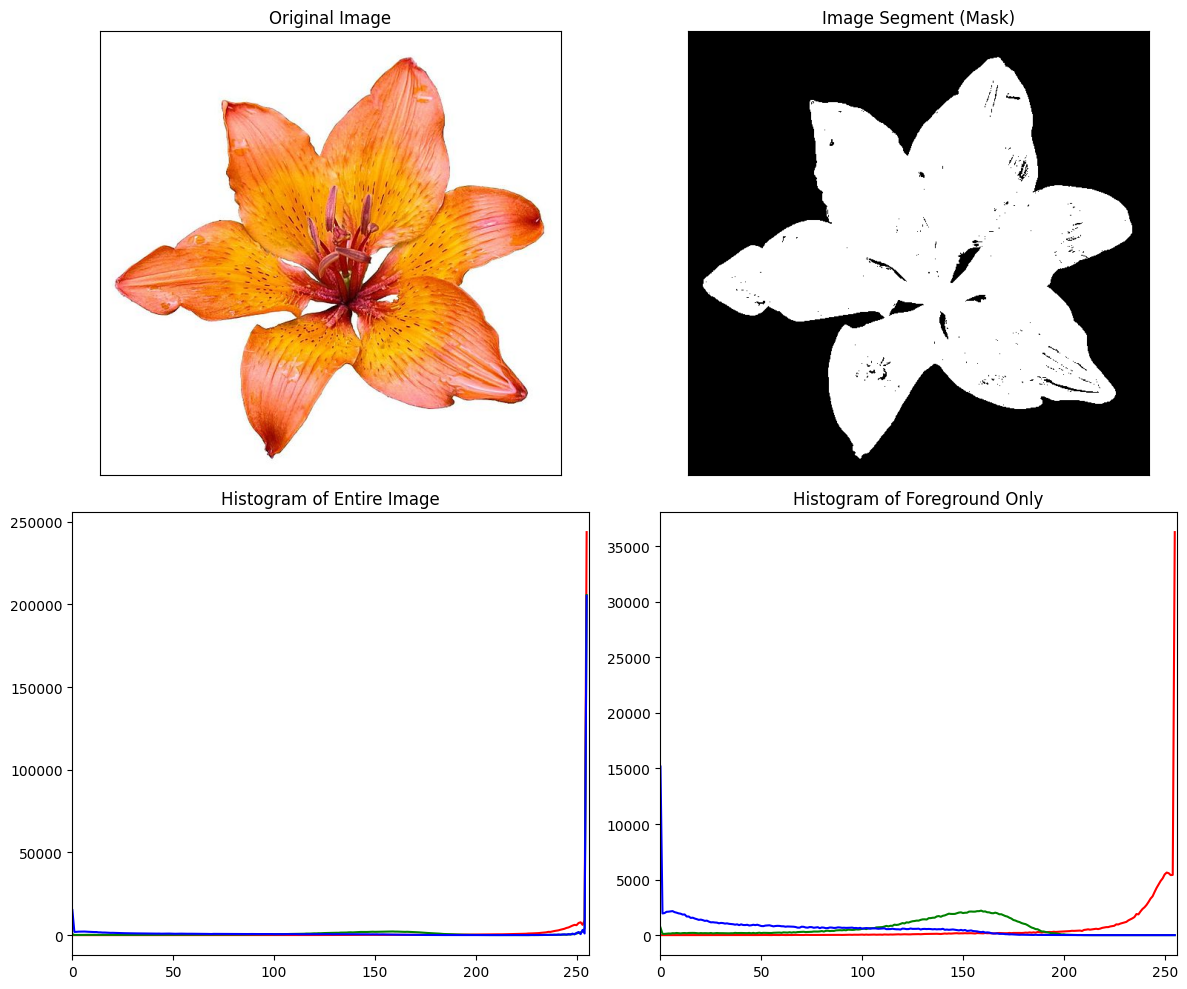

In [8]:
imgC = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')
imgC = cv.cvtColor(imgC, cv.COLOR_BGR2RGB)

img_gray = cv.cvtColor(imgC, cv.COLOR_RGB2GRAY)


_, mask = cv.threshold(img_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.imshow(imgC)
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2)
plt.imshow(mask, 'gray')
plt.title('Image Segment (Mask)')
plt.xticks([]), plt.yticks([])

colors = ('r', 'g', 'b')

plt.subplot(2, 2, 3)
for i, col in enumerate(colors):
    hist_full = cv.calcHist([imgC], [i], None, [256], [0, 256])
    plt.plot(hist_full, color=col)
plt.title('Histogram of Entire Image')
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
for i, col in enumerate(colors):
    hist_masked = cv.calcHist([imgC], [i], mask, [256], [0, 256])
    plt.plot(hist_masked, color=col)
plt.title('Histogram of Foreground Only')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### 6. Perform color segmentation on the image "peppers.jpg", displaying only the yellow color. (Hint: You can use K-Means to display only certain colors.)